## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow.keras as keras
keras.__version__

'2.7.0'

In [20]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Training'
valid_path = 'Testing'


In [21]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [22]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [23]:
  # useful for getting number of output classes
folders = glob('Training/*')

In [24]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
pwd

'C:\\Users\\shaya\\assignment 1 PDC\\Forest Fire Dataset'

In [30]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1520 images belonging to 2 classes.


In [43]:
test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 380 images belonging to 1 classes.


In [38]:
pwd

'C:\\Users\\shaya\\assignment 1 PDC\\Forest Fire Dataset'

In [ ]:
from sklearn.model_selection import train_test_split
import os
from shutil import copyfile


# Assuming you have a directory structure with subdirectories for each class
# Adjust the paths accordingly based on your actual directory structure

os.makedirs(test_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)
print("Source Directory:", source_directory)
print("Test Directory:", test_directory)
print("Validation Directory:", val_directory)
if os.path.exists(source_path):
    # Proceed with copying
    copyfile(source_path, destination_path)
else:
    print(f"File not found: {source_path}")

# Source directory containing all images
source_directory = 'Testing'

# Destination directories for testing and validation
test_directory = 'Testing/testing/'
val_directory = 'Testing/validation/'

# List all files in the source directory
all_files = os.listdir(source_directory)

# Split the data into testing and validation sets
test_files, val_files = train_test_split(all_files, test_size=0.5, random_state=42)

# Copy files to the respective directories
for file in test_files:
    source_path = os.path.join(source_directory, file)
    destination_path = os.path.join(test_directory, file)
    copyfile(source_path, destination_path)

for file in val_files:
    source_path = os.path.join(source_directory, file)
    destination_path = os.path.join(val_directory, file)
    copyfile(source_path, destination_path)


In [44]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model.save('newmodel.h5')

Epoch 1/5
48/48 [==============================] - 414s 9s/step - loss: 0.1940 - accuracy: 0.9243 - val_loss: 4.3429 - val_accuracy: 0.4316
Epoch 2/5
48/48 [==============================] - 411s 9s/step - loss: 0.1237 - accuracy: 0.9592 - val_loss: 4.5317 - val_accuracy: 0.5105
Epoch 3/5
48/48 [==============================] - 409s 9s/step - loss: 0.1229 - accuracy: 0.9572 - val_loss: 4.8469 - val_accuracy: 0.4974
Epoch 4/5
48/48 [==============================] - 408s 9s/step - loss: 0.0890 - accuracy: 0.9730 - val_loss: 5.1012 - val_accuracy: 0.5184
Epoch 5/5
48/48 [==============================] - 407s 8s/step - loss: 0.0805 - accuracy: 0.9743 - val_loss: 5.3288 - val_accuracy: 0.5053


In [23]:
model.save('newmodel.h5')

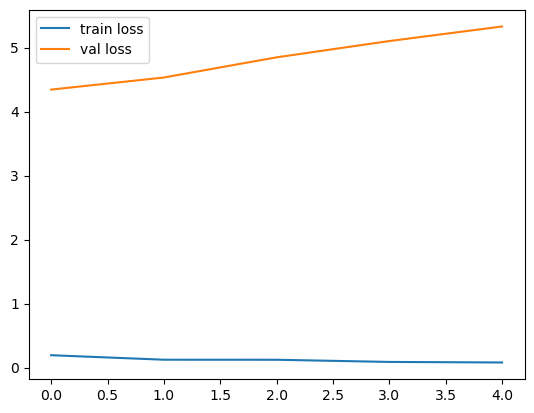

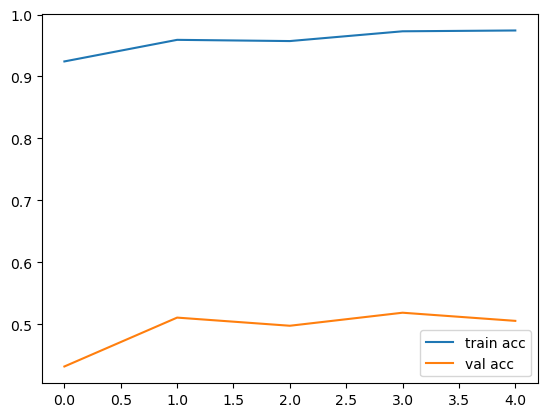

<Figure size 640x480 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file

import tensorflow as tf

from tensorflow.keras.models import load_model


In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from tensorflow.keras.applications.vgg1 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3





In [29]:
model = load_model('newmodel.h5')

In [ ]:
models =load_model('model_vgg16.h5')

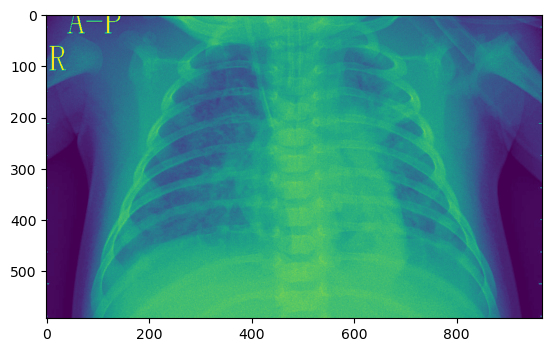

In [30]:
x=plt.imread('val/EDEMA/person1946_bacteria_4874.jpeg')
plt.imshow(x)

In [ ]:
x = model.predict([prepare('val/EDEMA/person1946_bacteria_4874.jpeg')])

In [ ]:
x = model.predict('val/EDEMA/person1946_bacteria_4874.jpeg')

In [31]:
from tensorflow.keras.preprocessing import image

In [32]:
testimage=image.load_img('val/EDEMA/person1946_bacteria_4874.jpeg', target_size=(224,224))
testimage = image.img_to_array(testimage)
testimage=np.expand_dims(testimage, axis=0)

result=model.predict(testimage)

print(result)

[[1. 0.]]


In [33]:
if result[0][0]==1:
    predictresult='Edema Found'
    print(predictresult)
else:
    predictresult='Edema Not Found'
    print(predictresult)

Edema Found


In [34]:
testimage=image.load_img('../val/Normal/NORMAL2-IM-1436-0001.jpeg', target_size=(224,224))
testimage = image.img_to_array(testimage)
testimage=np.expand_dims(testimage, axis=0)

result=model.predict(testimage)

print(result)

[[0. 1.]]


In [35]:
if result[0][0]==1:
    predictresult='Edema Found'
    print(predictresult)
else:
    predictresult='Edema Not Found'
    print(predictresult)

Edema Not Found


In [36]:
testimage=image.load_img('val/NORMAL/NORMAL2-IM-1438-0001.jpeg', target_size=(224,224))
testimage = image.img_to_array(testimage)
testimage=np.expand_dims(testimage, axis=0)

result=model.predict(testimage)

print(result)

if result[0][0]==1:
    predictresult='Edema Found'
    print(predictresult)
else:
    predictresult='Edema Not Found'
    print(predictresult)

[[1. 0.]]
Edema Found


In [ ]:
model.summary()

In [40]:
testimage=image.load_img('val/NORMAL/NORMAL2-IM-1437-0001.jpeg', target_size=(224,224))
testimage = image.img_to_array(testimage)
testimage=np.expand_dims(testimage, axis=0)

result=model.predict(testimage)

print(result)

if result[0][0]==1:
    predictresult='Edema Found'
    print(predictresult)
else:
    predictresult='Edema Not Found'
    print(predictresult)

[[0. 1.]]
Edema Not Found


In [ ]:
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss1')

# plot the accuracy
plt.plot(model.history['acc'], label='train acc')
plt.plot(model.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc1')

In [ ]:
history = model.history

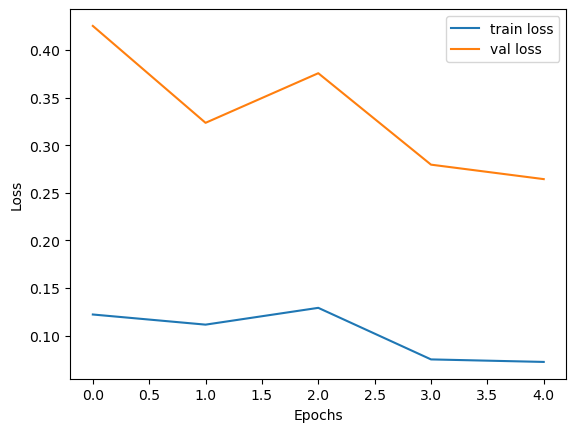

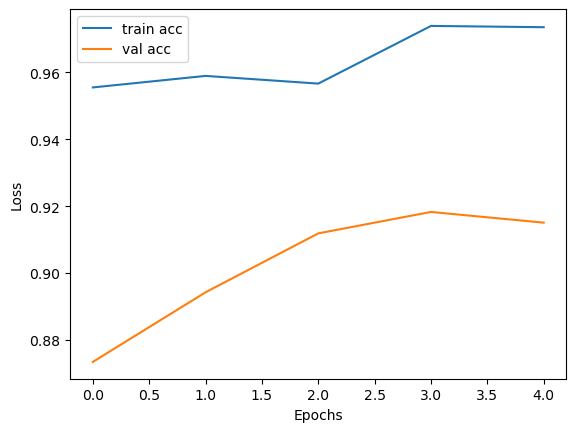

<Figure size 640x480 with 0 Axes>

In [39]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss1')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc1')